# Results of different #agent values

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
results = pd.read_csv('./robots_results.csv')
results = results.drop_duplicates(subset=['planner','damage'])
results = results.groupby(['planner','num_robots','num_agents'], as_index=False).mean()
results.head()

,planner,num_robots,num_agents,f,d,completion_time,planner_time,damage,num_disabled
0,Additive100StaticLackPlanner,2,200,2.0,5.0,294.695334,0.056074,49374.311990,37.200000
1,Additive100StaticLackPlanner,3,200,2.0,5.0,293.910227,0.077423,49337.653769,37.241379
2,Additive100StaticLackPlanner,4,200,2.0,5.0,295.155852,0.079457,49346.004376,37.500000
3,Additive100StaticLackPlanner,5,200,2.0,5.0,293.451749,0.079190,49340.285297,36.680000
4,Additive100StaticLackPlanner,6,200,2.0,5.0,294.511028,0.137972,49250.234849,39.947368


In [35]:
planners_names = ['StaticLineLackPlanner',
                  'SeparateStaticLackPlanner',
                  'Additive50StaticLackPlanner',
                  'Additive100StaticLackPlanner',
                  'IterativeAssignmentPlanner',
                  'KmeansAssignmentPlanner',
                  ]
planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Settings

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

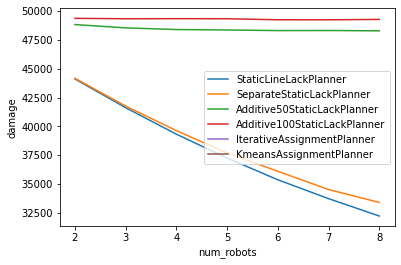

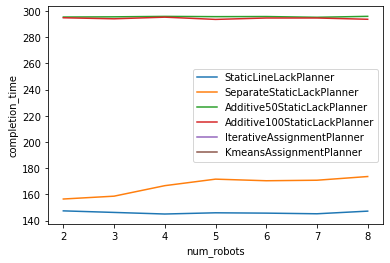

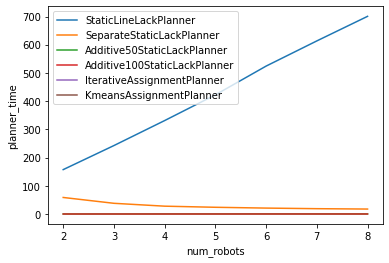

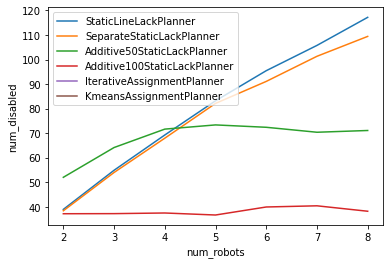

In [36]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_robots' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for r in planners_results:
        plt.plot(list(r[x]),list(r[y]))

    plt.legend(planners_names)
    # plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()